<a href="https://colab.research.google.com/github/joaquimrafael/Data_management/blob/main/probabilites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab  

O objetivo deste Lab é você entender:

1. Distribuições discretas e contínuas
2. Funções de Probabilidade, Probabilidade Acumulada e sua inversa

Referências e Materiais úteis para este Lab:

Brown, R. J. [Connecting the CDF and the PDF](http://demonstrations.wolfram.com/ConnectingTheCDFAndThePDF/) *Wolfram Demonstrations Project*.


---



In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 3)

# Simulando diferentes distribuições `.rvs()`

# Distribuições Discretas

A **distribuição binomial** descreve o número de sucessos em um número fixo de tentativas independentes, onde cada tentativa tem apenas dois resultados possíveis (sucesso ou fracasso) com probabilidades constantes. Modela por exemplo eventos como lançamento de uma moeda, sucesso ou falha em um experimento, entre outros.

A **distribuição de Poisson** é usada para modelar a ocorrência de eventos discretos ao longo de um intervalo contínuo, quando a média de eventos por unidade de tempo ou espaço é conhecida. Esses eventos devem ser independentes e a taxa de ocorrência deve ser constante. A distribuição de Poisson é comumente aplicada em problemas relacionados a contagem de ocorrências, como número de chamadas telefônicas recebidas em um determinado período, acidentes de trânsito em uma rodovia em um dia, entre outros.

## Lançamento de uma moeda

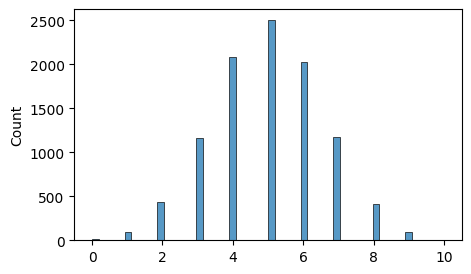

In [ ]:
from scipy.stats import binom

# Definindo os parâmetros da distribuição binomial
n = 10  # Número de tentativas
p = 0.5  # Probabilidade de sucesso

# Gerando uma amostra da distribuição binomial
sample = binom.rvs(n, p, size=10000, random_state=1)

# Exibindo a amostra
sns.histplot(sample)
plt.show()


## Número de Acidentes Diários nas Estradas

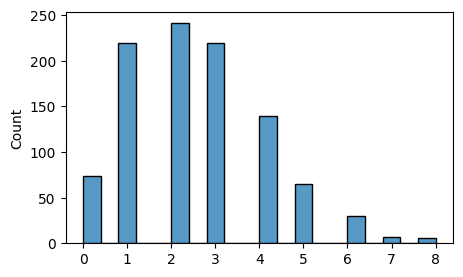

In [ ]:
from scipy.stats import poisson

# Definindo o parâmetro da distribuição de Poisson
mu = 2.5  # Taxa de ocorrência média

# Gerando uma amostra da distribuição de Poisson
sample = poisson.rvs(mu, size=1000, random_state=1)

# Exibindo a amostra
sns.histplot(sample)
plt.show()

Note que cada distribuição possui seus parâmetros.

# Distribuições Contínuas

As distribuições acima apresentam distribuições contínuas equivalentes.

A **distribuição Normal** descreve uma série de fenômenos naturais (ou não) em que os valores são dispersos de forma simétrica (forma de sino) em torno da média. A altura e peso das pessoas, notas de exames, erros de medida apresentam em geral distribuições normais.

A **distribuição Exponencial** descreve o tempo entre eventos sucessivos em um processo de Poisson, ou seja, o tempo decorrido até que ocorra um evento e é empregada para modelar modelar tempos de espera em uma fila de atendimento ou o tempo entre falhas de um equipamento.

## Notas de um exame

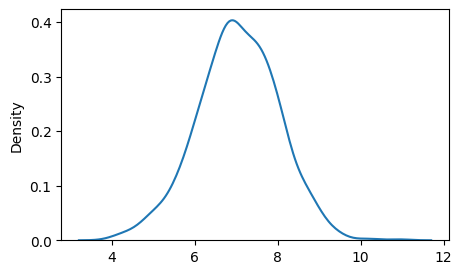

In [ ]:
from scipy.stats import norm, expon

# Simulação da distribuição normal
mu = 7  # Média
sigma = 1  # Desvio padrão
sample = norm.rvs(mu, sigma, 1000, random_state=1) # norm.rvs(loc=mu, scale=sigma, size=1000, random_state=1)

# Exibindo a amostra
sns.kdeplot(sample)

plt.show()



## Tempo de espera e uma Fila (2 clientes/min)

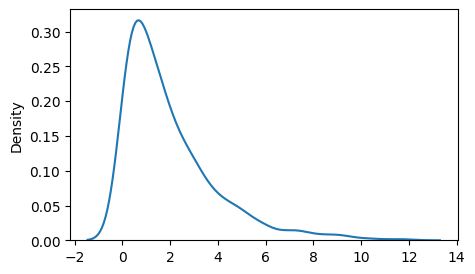

In [ ]:
from scipy.stats import norm, expon

# Simulação da distribuição exponencial
lambda_param = 0.5  # Taxa média de ocorrência
sample = expon.rvs(scale=1/lambda_param, size=1000, random_state=1)

# Exibindo a amostra
sns.kdeplot(sample)

plt.show()


Mais uma vez, cada distribuição tem parâmetros próprios.

# PDF, CDF e PPF

* `*.pdf()`, probability distribution function
* `*.cdf()`, cummulative distribution function
* `*.ppf()`, percent point function



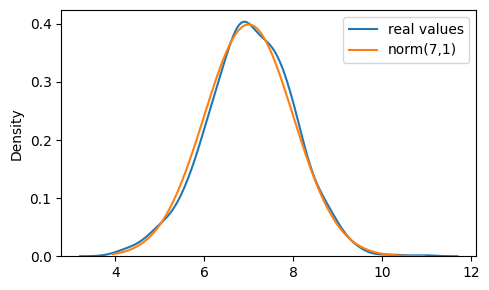

In [ ]:
sample = norm.rvs(loc=7,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

values = np.linspace(min(sample),max(sample),100)
p = norm.pdf(values,loc=7,scale=1)

sns.kdeplot(x=sample,ax=ax,label='real values')
sns.lineplot(x=values,y=p,ax=ax,label='norm(7,1)')

plt.legend()
plt.tight_layout()
plt.show()

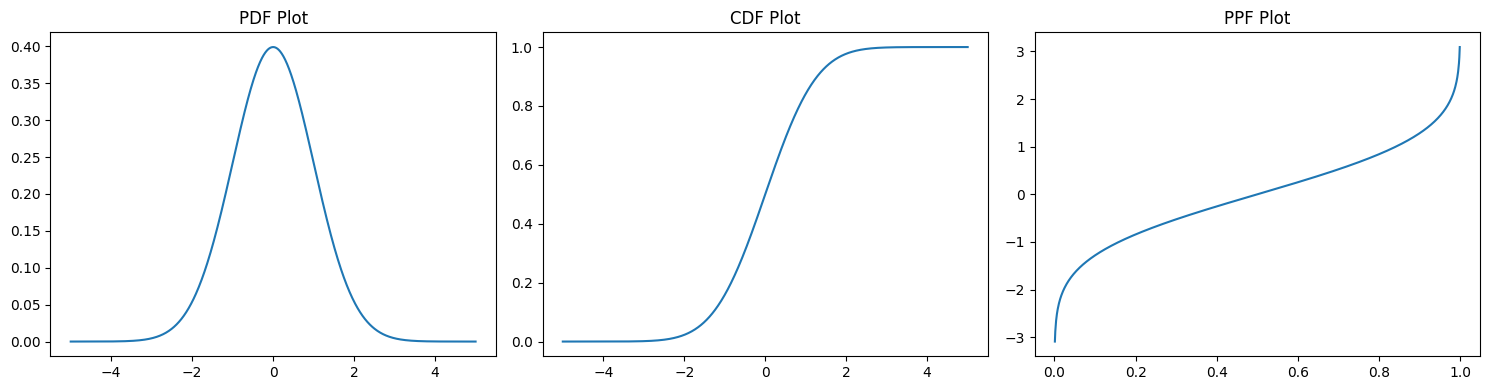

In [ ]:
from scipy.stats import norm

fig, ax = plt.subplots(1,3,figsize=(15,4))

sample = np.linspace(-5, 5, 1000)

ax[0].plot(sample,norm.pdf(sample))
ax[0].set_title('PDF Plot')

ax[1].plot(sample,norm.cdf(sample))
ax[1].set_title('CDF Plot')

p = np.linspace(0, 0.999, 1000)
ax[2].plot(p,norm.ppf(p))
ax[2].set_title('PPF Plot')

plt.tight_layout()
plt.show()



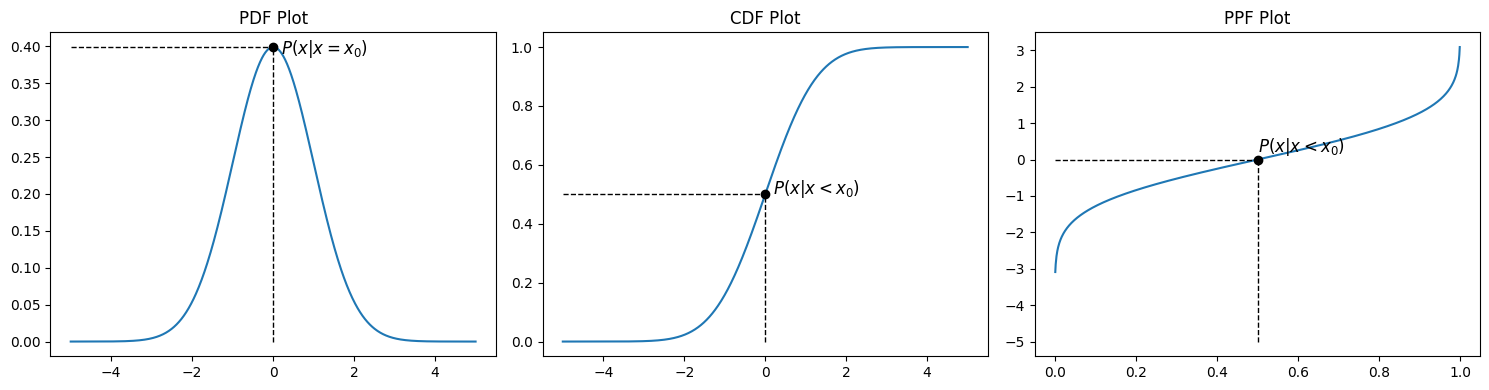

In [ ]:
from scipy.stats import norm

fig, ax = plt.subplots(1,3,figsize=(15,4))

sample = np.linspace(-5, 5, 1000)

ax[0].plot(sample,norm.pdf(sample))

ax[0].vlines(0,0,norm.pdf(0),linestyle='--',color='k',lw=1)
ax[0].hlines(norm.pdf(0),-5,0,linestyle='--',color='k',lw=1)
ax[0].plot(0,norm.pdf(0),'ko')

ax[0].text(0+0.2,norm.pdf(0)-.01,'$P(x | x = x_0)$',fontsize=12)

ax[0].set_title('PDF Plot')

ax[1].plot(sample,norm.cdf(sample))

ax[1].vlines(0,0,norm.cdf(0),linestyle='--',color='k',lw=1)
ax[1].hlines(norm.cdf(0),-5,0,linestyle='--',color='k',lw=1)
ax[1].plot(0,norm.cdf(0),'ko')

ax[1].text(0+0.2,norm.cdf(0),'$P(x | x < x_0)$',fontsize=12)

ax[1].set_title('CDF Plot')

p = np.linspace(0, 0.999, 1000)
ax[2].plot(p,norm.ppf(p))

ax[2].hlines(0,0,norm.cdf(0),linestyle='--',color='k',lw=1)
ax[2].vlines(norm.cdf(0),-5,0,linestyle='--',color='k',lw=1)
ax[2].plot(norm.cdf(0),0,'ko')

ax[2].text(norm.cdf(0),0+0.2,'$P(x | x < x_0)$',fontsize=12)

ax[2].set_title('PPF Plot')

plt.tight_layout()
plt.show()





## `pdf(x, loc=0, scale=1)`, $P(x=x_0)$

Obtém a *probabilidade* para um ponto específico. De fato, pouca aplicabilidade prática já que um ponto em uma probabilidade de valores contínuos tem probabilidade 0.

In [ ]:
norm.pdf(0) # probability distribution function

0.3989422804014327

## `cdf(x, loc=0, scale=1)`, $P(x | x\le x_0)$


In [ ]:
norm.cdf(0) # cummulative distribution function

0.5

## `ppf(x, loc=0, scale=1)`, $x_0 | P(x|x\le x_0) = p$

É o inverso da `cdf`.

In [ ]:
norm.ppf(0.5) # percent point function

0.0

# Exemplo

Uma fábrica produz HDs SSD com uma vida útil de 5 anos. Sabe-se que o desvio padrão da durabilidade desses HDs é de 5 meses.




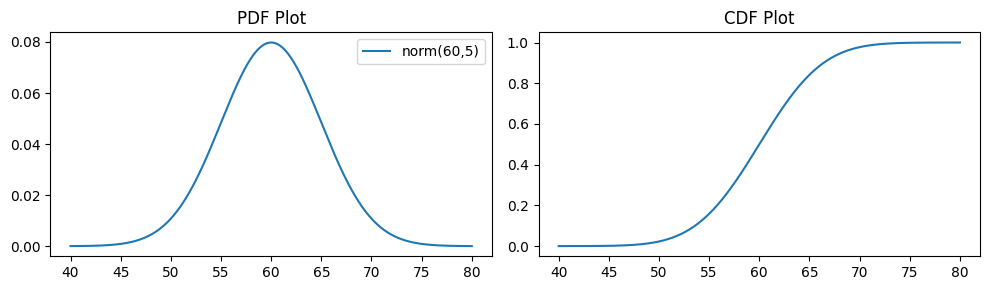

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 5*12
sigma = 5
values = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

sns.lineplot(x=values, y=norm.pdf(values,loc=mu,scale=sigma), ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

sns.lineplot(x=values, y=norm.cdf(values,loc=mu,scale=sigma),ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Estime o número de HDs que precisarão ser trocados após 48 meses.

In [ ]:
norm.cdf(60,loc=mu,scale=sigma) * 1000

500.0

In [ ]:
norm.cdf(48,loc=mu,scale=sigma) * 1000

8.197535924596131

Você faz uma reserva técnicas comprando 10% de HDs para trocas. Essa reserva deve garantir quantos meses de trocas?

In [ ]:
norm.ppf(0.10,loc=mu,scale=sigma)

53.592242172277

# Exercício

Você compra mil sacas de café de 60Kg. O fornecedor garante um desvio padrão de 200g por saca. Qual a chance de você obter em 100 sacas uma saca com menos de 59.5Kg?




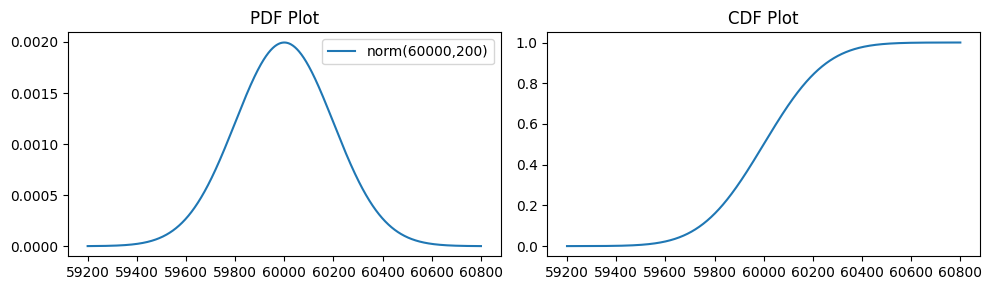

In [ ]:
# seu código

fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 60000    # Evite mu = 60, sigma = 0.2 para o PDF
sigma = 200
values = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

sns.lineplot(x=values, y=norm.pdf(values,loc=mu,scale=sigma), ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

sns.lineplot(x=values, y=norm.cdf(values,loc=mu,scale=sigma),ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Qual a probabilidade de você obter sacas com peso abaixo ou acima de 2 e 3 vezes o desvio padrão?

In [ ]:
# seu código

2 * norm.cdf(60000 - 2*200, loc=60000, scale=200)

0.04550026389635839

In [ ]:
2 * norm.cdf(60000 - 3*200, loc=60000, scale=200)

0.0026997960632601866

Você encontrou em uma amostra das 100 sacas adquiridas 2 sacas pouco abaixo de 59.6 Kg. Você pode considerar que a informação do fornecedor é confiável? **Ainda, sim.**

In [ ]:
# seu código
norm.ppf(0.02,loc=60000,scale=200)

59589.25021787363

Sendo verdadeira a informação do fornecedor, qual o intervalo de peso que você deve encontrar em 95% das amostras?

In [ ]:
# seu código
norm.ppf(1 - 0.025,loc=60000,scale=200)

60391.99279690801

In [ ]:
norm.ppf(0.025,loc=60000,scale=200)

59608.00720309199